In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import rebound as rb
from celmech import Poincare, PoincareHamiltonian
from sympy import init_printing
from sympy import latex
init_printing()

(<Figure size 360x360 with 1 Axes>, <AxesSubplot:xlabel='x', ylabel='y'>)

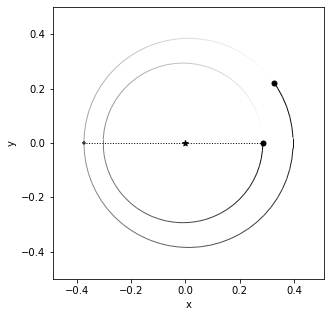

In [2]:
sim = rb.Simulation()
sim.add(m=1,hash='star')
sim.add(m=3e-6,P = 1, e = 0.03,l=0)
sim.add(m=3e-6,P = 3/2, e = 0.03,l=np.pi/5,pomega = np.pi)
sim.move_to_com()
rb.OrbitPlot(sim,periastron=True)

In [3]:
pvars = Poincare.from_Simulation(sim)
pham = PoincareHamiltonian(pvars)

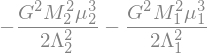

In [4]:
pham.H

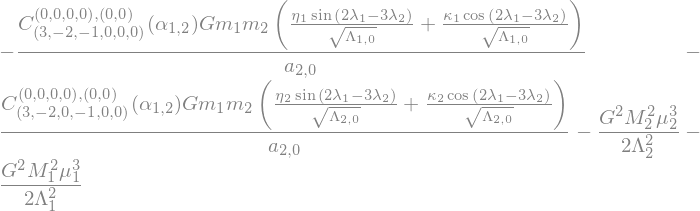

In [5]:
pham.add_MMR_terms(3,1,max_order=1)
pham.H

In [6]:
Nout = 150
times = np.linspace(0 , 3e3, Nout) * sim.particles[1].P
keys = ['l1','l2','pomega1','pomega2','e1','e2','a1','a2']

rebound_results= {key:np.zeros(Nout) for key in keys}
celmech_results= {key:np.zeros(Nout) for key in keys}

rb_particles = sim.particles
cm_particles = pvars.particles

for i,t in enumerate(times):
    
    sim.integrate(t)
    pham.integrate(t)
    
    for j,p_rb,p_cm in zip([1,2],rb_particles[1:],cm_particles[1:]):
        
        rebound_results["l{}".format(j)][i] = p_rb.l
        rebound_results["pomega{}".format(j)][i] = p_rb.pomega
        rebound_results["e{}".format(j)][i] = p_rb.e
        rebound_results["a{}".format(j)][i] = p_rb.a

        celmech_results["l{}".format(j)][i] = p_cm.l
        celmech_results["pomega{}".format(j)][i] = p_cm.pomega
        celmech_results["e{}".format(j)][i] = p_cm.e
        celmech_results["a{}".format(j)][i] = p_cm.a

In [7]:
for d in [celmech_results,rebound_results]:
    d['theta1'] = np.mod(3 * d['l2'] - 2 * d['l1'] - d['pomega1'],2*np.pi)
    d['theta2'] = np.mod(3 * d['l2'] - 2 * d['l1'] - d['pomega2'],2*np.pi)

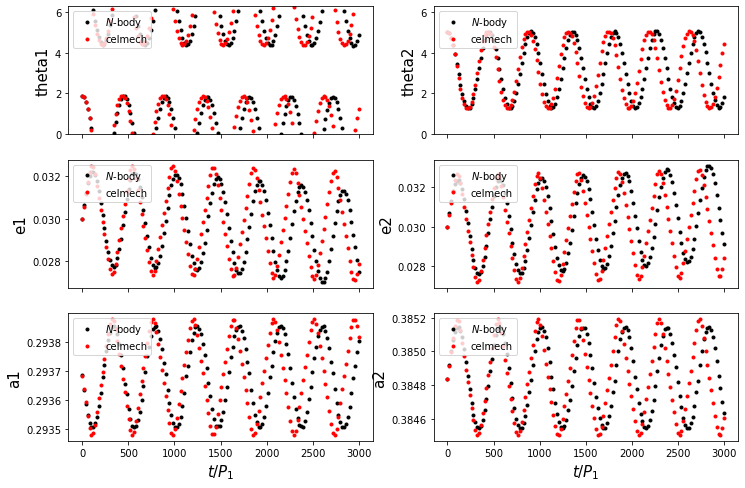

In [8]:
fig,ax = plt.subplots(3,2,sharex = True,figsize = (12,8))
for i,q in enumerate(['theta','e','a']):
    for j in range(2):
        key = "{:s}{:d}".format(q,j+1)
        ax[i,j].plot(times,rebound_results[key],'k.',label='$N$-body')
        ax[i,j].plot(times,celmech_results[key],'r.',label='celmech')
        ax[i,j].set_ylabel(key,fontsize=15)
        ax[i,j].legend(loc='upper left')
ax[0,0].set_ylim(0,2*np.pi);
ax[0,1].set_ylim(0,2*np.pi);
ax[2,0].set_xlabel(r"$t/P_1$",fontsize=15);
ax[2,1].set_xlabel(r"$t/P_1$",fontsize=15);